In [ ]:
#The starter code (starter.py  download) converts the data from text files to a Pandas data frame. This data-frame has 2 attributes, reviews (text) and sentiments (0 or 1).

#Task: Follow below steps and/or refer to the starter code. 
#Clean the data by removing stop-words, punctuations, emoticons etc..,
#Train and test the model using TfidfVectorizer, Pipeline, Logistic regression with this data.
#Print the best_params_, best_score_, score.

In [114]:
#imports 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
import re
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
import pandas as pd

In [115]:
# Opening the file
f = open("C:/Users/benso/Desktop/Projects/Usable_AI_Code/Homework9/amazon_cells_labelled.txt", "r")
data =[]
# Converting it to pandas dataframe
for line in f:
    review = line[:len(line) - 2]
    sentiment = line[len(line)-2]
    row = [review, sentiment]
    data.append(row)

df = pd.DataFrame(data, columns = ['reviews', 'sentiment'])

In [116]:
df.head()

,reviews,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.\t",1
2,Great for the jawbone.\t,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.\t,1


In [117]:
#remove stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')

#df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

df["reviews"] = df["reviews"].apply(stopwords)
df.head()

#df["reviews"] = df["reviews"].str.lower().str.split()

#df['reviews'].apply(lambda x: [item for item in x if item not in stop])


,reviews,sentiment
0,way plug us unless go converter.,0
1,"good case, excellent value.",1
2,great jawbone.,1
3,tied charger conversations lasting 45 minutes....,0
4,mic great.,1


In [118]:
#punctuations
import string
df['reviews'].str.replace('[{}]'.format(string.punctuation), '')


ipykernel_launcher:3: FutureWarning: The default value of regex will change from True to False in a future version.


0                        way plug us unless go converter
1                              good case excellent value
2                                          great jawbone
3      tied charger conversations lasting 45 minutesm...
4                                              mic great
                             ...                        
995           screen get smudged easily touches ear face
996                          piece junk lose calls phone
997                                   item match picture
998                 thing disappoint infra red port irda
999                  answer calls unit never worked once
Name: reviews, Length: 1000, dtype: object

In [119]:
#remove common words

from collections import Counter
cnt = Counter()
for text in df["reviews"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('phone', 118),
 ('good', 66),
 ('great', 63),
 ('works', 43),
 ('battery', 39),
 ('sound', 35),
 ('one', 34),
 ('quality', 33),
 ('phone.', 33),
 ('would', 32)]

In [120]:
freq = set([w for (w, wc) in cnt.most_common(10)])
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
df["reviews"] = df["reviews"].apply(freqwords)
df["reviews"].head()

0                     way plug us unless go converter.
1                               case, excellent value.
2                                             jawbone.
3    tied charger conversations lasting 45 minutes....
4                                           mic great.
Name: reviews, dtype: object

In [121]:
#remove emoticons

from emot.emo_unicode import UNICODE_EMO, EMOTICONS

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df['reviews'] = df['reviews'].apply(remove_emoticons)


In [122]:
df.head()

,reviews,sentiment
0,way plug us unless go converter.,0
1,"case, excellent value.",1
2,jawbone.,1
3,tied charger conversations lasting 45 minutes....,0
4,mic great.,1


In [ ]:
 count_vect = TfidfVectorizer(input="english")

 tf = tfidfvectorizer()
 tf.fit(df["reviews"])
 trainx = tf.transform(train)
 testx = tf.transform(test)

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = TfidfVectorizer(input="english")

X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['sentiment'])
#X_train = count_vect.fit(X_train)


#text_clf = Pipeline([('vect', TfidfVectorizer()),
#('logreg', LogisticRegression())])

In [125]:
 from sklearn.feature_extraction.text import TfidfVectorizer

 tf = TfidfVectorizer(input="english")
 tf.fit(df["reviews"])

TfidfVectorizer(input='english')

<AxesSubplot:>

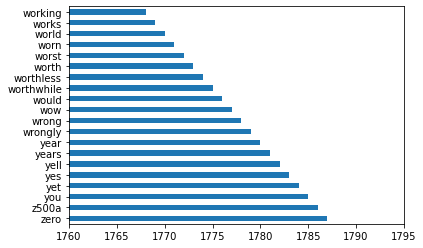

In [165]:
dictionary = tf.vocabulary_.items()

vocab = []
count = []

for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

top_vocab = vocab_bef_stem.head(20)

top_vocab.plot(kind='barh',xlim=(1760,1795))

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['sentiment'])


In [151]:
trainx = tf.transform(X_train)
testx = tf.transform(X_test)
print(testx.shape)

(250, 1788)


In [128]:
text_clf = Pipeline([('logreg', LogisticRegression())])

In [143]:
text_clf.fit(trainx, y_train)


Pipeline(steps=[('logreg', LogisticRegression())])

In [152]:
print(testx.shape)

(250, 1788)


In [153]:
#Print the best_params_, best_score_, score.
#y_test = y_test.reshape(1, -1)
predicted = text_clf.predict(testx)

In [157]:
import numpy as np 

print(np.mean(predicted == y_test))

0.748


In [166]:
#dataset 2: imdb_labelled.txt

# Opening the file
f = open("C:/Users/benso/Desktop/Projects/Usable_AI_Code/Homework9/imdb_labelled.txt", "r")
data =[]
# Converting it to pandas dataframe
for line in f:
    review = line[:len(line) - 2]
    sentiment = line[len(line)-2]
    row = [review, sentiment]
    data.append(row)

df = pd.DataFrame(data, columns = ['reviews', 'sentiment'])

In [167]:
#remove stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')

#df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

df["reviews"] = df["reviews"].apply(stopwords)
df.head()

#df["reviews"] = df["reviews"].str.lower().str.split()

#df['reviews'].apply(lambda x: [item for item in x if item not in stop])

,reviews,sentiment
0,"very, very, slow-moving, aimless movie distres...",0
1,"sure lost - flat characters audience, nearly h...",0
2,attempting artiness black & white clever camer...,0
3,little music anything speak of.,0
4,best scene movie gerardo trying find song keep...,1


In [168]:
#punctuations
import string
df['reviews'].str.replace('[{}]'.format(string.punctuation), '')

ipykernel_launcher:3: FutureWarning: The default value of regex will change from True to False in a future version.


0      very very slowmoving aimless movie distressed ...
1      sure lost  flat characters audience nearly hal...
2      attempting artiness black  white clever camera...
3                         little music anything speak of
4      best scene movie gerardo trying find song keep...
                             ...                        
995    got bored watching jessice lange take clothes off
996    unfortunately virtue films production work los...
997                                    word embarrassing
998                                    exceptionally bad
999            insult ones intelligence huge waste money
Name: reviews, Length: 1000, dtype: object

In [169]:
#remove common words

from collections import Counter
cnt = Counter()
for text in df["reviews"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('movie', 132),
 ('film', 107),
 ('one', 69),
 ('good', 47),
 ('like', 47),
 ('bad', 44),
 ('really', 40),
 ('even', 39),
 ('it.', 38),
 ('great', 37)]

In [170]:
freq = set([w for (w, wc) in cnt.most_common(10)])
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
df["reviews"] = df["reviews"].apply(freqwords)
df["reviews"].head()

0    very, very, slow-moving, aimless distressed, d...
1    sure lost - flat characters audience, nearly h...
2    attempting artiness black & white clever camer...
3                      little music anything speak of.
4    best scene gerardo trying find song keeps runn...
Name: reviews, dtype: object

In [171]:
#remove emoticons

from emot.emo_unicode import UNICODE_EMO, EMOTICONS

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df['reviews'] = df['reviews'].apply(remove_emoticons)

In [173]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = TfidfVectorizer(input="english")

X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['sentiment'])
#X_train = count_vect.fit(X_train)


#text_clf = Pipeline([('vect', TfidfVectorizer()),
#('logreg', LogisticRegression())])

In [174]:
 from sklearn.feature_extraction.text import TfidfVectorizer

 tf = TfidfVectorizer(input="english")
 tf.fit(df["reviews"])

TfidfVectorizer(input='english')

<AxesSubplot:>

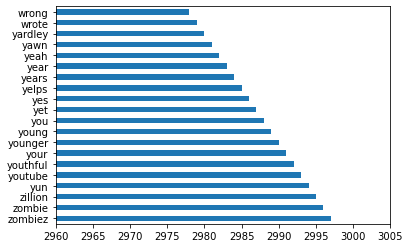

In [183]:
dictionary = tf.vocabulary_.items()

vocab = []
count = []

for key, value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

top_vocab = vocab_bef_stem.head(20)

top_vocab.plot(kind='barh',xlim=(2960,3005))

In [184]:
trainx = tf.transform(X_train)
testx = tf.transform(X_test)
print(testx.shape)

(250, 2998)


In [185]:
text_clf = Pipeline([('logreg', LogisticRegression())])

In [186]:
text_clf.fit(trainx, y_train)

Pipeline(steps=[('logreg', LogisticRegression())])

In [187]:
predicted = text_clf.predict(testx)

In [188]:
import numpy as np 

print(np.mean(predicted == y_test))

0.772
